# Neu 560 (2018-02-27): Neural encoding models & maximum likelihood

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
%matplotlib inline

## Sampling vs. inference
Simply put, the process of estimating parameters from data is **inference** (or model fitting) whereas the process of drawing observations from a set of parameters is **sampling**.

## Properties of estimators
From a set of observations, $x$, we can attempt to estimate or infer a set of parameters $\theta$. When parameters are estimated, we denote this as $\hat{\theta}$.

Estimates have three important properties: bias, variance, and efficiency. The **bias** of an estimator, $b(\theta)$, describes the consistency in mis-estimation of a parameter: 

> $ b(\theta) = E \left[ \hat{\theta} \right] - \theta $

The **variance** of an estimator describes how consistently an estimator is centered as its true value:

> $ var(\theta) = E\left[ (\hat{\theta} - E \left[ \hat{\theta} \right] )^2 \right] $

**Efficiency** will be described below.

## Linear Poisson regression 
The Poisson distribution is a probability distribution over discrete events. In neural encoding models, we can write that a number of spikes $y$ can be described by:

$$ y \sim Poiss(\lambda) $$

where $\lambda$ describes the spike rate:

$$ \lambda = \theta x $$

where $x$ is some stimulus value and $\theta$ maps the stimulus to spike rate. 

The Poisson distribution itself is defined as:

$$ P(y \mid x, \theta) = \frac{1}{y!} \lambda^y e^{-\lambda} $$

where we can substitute $\lambda$ as defined above:

$$ = \frac{1}{y!} (\theta x)^y e^{-\theta x} $$

The Poisson has a peculiar and important property: its mean and variance are equal. In other words, the Poisson assumes:

$$ \text{mean}(y) = \text{var}(y) = \theta x $$

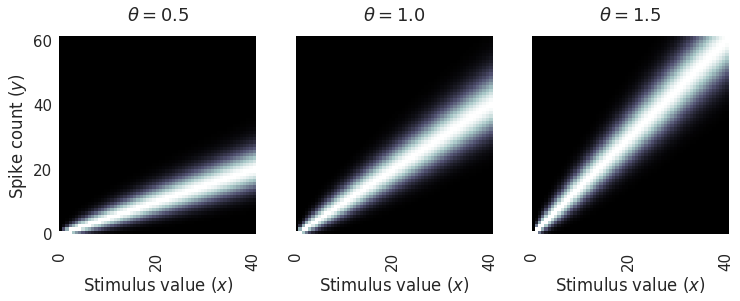

In [2]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True)

## Sample stimulus space.
x = np.linspace(0,40,61)
y = np.arange(61)
X, Y = np.array(np.meshgrid(x, y))

## Main loop.
normalize = lambda arr: (arr - arr.min()) / (arr.max() - arr.min())
for ax, theta in zip(axes, [0.5,1.0,1.5]):
    
    ## Compute PMF.
    pmf = poisson.pmf(Y, X * theta)
    pmf = np.apply_along_axis(normalize, 0, pmf)
    
    ## Plot.
    sns.heatmap(pmf, cmap='bone', square=True, cbar=False, ax=ax)
    ax.set(xticks=[0,30,60], xticklabels=[0,20,40], xlabel=r'Stimulus value ($x$)',
           yticks=[0,20,40,60], yticklabels=[0,20,40,60], title=r'$\theta = %s$' %theta)
    if theta == 0.5: ax.set_ylabel('Spike count ($y$)')
    ax.invert_yaxis()

### Maximum Likelihood Estimation
The goal of maximum likelihood estimation (MLE) is to identify the set of parameters, $\theta$, that maximize the likelihood of observing a set of data, $X, Y$:

$$ P(Y \mid X, \theta) = \prod^N_{i=1} P(y_i \mid x_i, \theta) $$

Importantly, in this situation we are assuming **conditional independence** across trials (i.e. observing some $y_i$ has no bearing on $y_{i+1}$). This is typically not true for neural data.

Using the formulas defined above, we can express the likelihood function:

$$ P(Y \mid X, \theta) = \prod \frac{1}{y_i!}(\theta x_i)^{y_i} e^{-(\theta x_i)} $$

For numerical stability, we will redefine the above as the log-likelihood:

$$ \text{log} P(Y \mid X, \theta) = \sum_i \text{log} = P(Y \mid X, \theta) $$ 
$$ = \sum y_i \ \text{log} \theta - \theta x_i $$ 
$$ = \text{log} \theta (\sum y_i) - \theta (\sum x_i) $$

To find the point that maximizes this expression, we will take its derivative with respect to $\theta$ and set it equal to zero:

$$ \frac{d}{d\theta} \text{log} \theta (\sum y_i) - \theta (\sum x_i) = 0 $$

$$ \frac{1}{\theta} \sum y_i - \sum x_i = 0 $$

$$ \hat{\theta}_{ML} = \frac{\sum y_i}{\sum x_i} $$

Importantly, the maximum likelihood estimator has two properties:

- **Consistent:** it converges to the true $\theta$ in limit of infinite data.
- **Efficient:** it converges as quickly as possible, or achieves minimum possible asymptotic error.

## Linear Gaussian regression
The normal distribution is a probability distribution over continuous observations. In neural encoding models, we can write that a number of spikes $y$ can be described by:

$$ y \sim N(\mu, \sigma^2) $$

where $\mu$ describes the mean spike rate, defined as:

$$ \mu = \theta x $$

where $x$ is some stimulus value and $\theta$ maps the stimulus to spike rate. 

The normal distribution itself is defined as:

$$ P(y \mid x, \theta) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{\frac{-(y-\theta x)^2}{2 \sigma^2}} $$

In contrast to the Poisson, the normal distribution is described by its mean and variance which are independent.

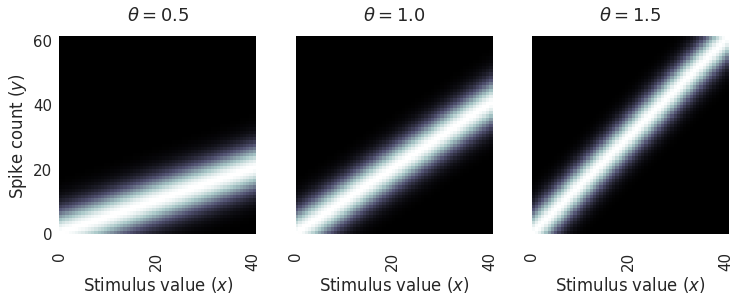

In [3]:
## Initialize canvas.
fig, axes = plt.subplots(1,3,figsize=(12,4),sharex=True,sharey=True)

## Sample stimulus space.
x = np.linspace(0,40,61)
y = np.arange(61)
X, Y = np.array(np.meshgrid(x, y))

## Main loop.
normalize = lambda arr: (arr - arr.min()) / (arr.max() - arr.min())
for ax, theta in zip(axes, [0.5,1.0,1.5]):
    
    ## Compute PMF.
    pdf = norm.pdf(Y, X * theta, 5)
    pdf = np.apply_along_axis(normalize, 0, pdf)
    
    ## Plot.
    sns.heatmap(pdf, cmap='bone', square=True, cbar=False, ax=ax)
    ax.set(xticks=[0,30,60], xticklabels=[0,20,40], xlabel=r'Stimulus value ($x$)',
           yticks=[0,20,40,60], yticklabels=[0,20,40,60], title=r'$\theta = %s$' %theta)
    if theta == 0.5: ax.set_ylabel('Spike count ($y$)')
    ax.invert_yaxis()

### Maximum Likelihood Estimation
Using the formulas defined above, we can express the log-likelihood function for the normal distribution:

$$ \text{log} P(Y \mid X, \theta) = -\sum \frac{(y_i - \theta x_i)^2}{2 \sigma^2}$$

To find the point that maximizes this expression, we will take its derivative with respect to $\theta$ and set it equal to zero:

$$ \frac{d}{d \theta} -\sum \frac{(y_i - \theta x_i)^2}{2 \sigma^2} = 0$$

$$ - \sum \frac{(y_i - \theta x_i)x_i}{\sigma^2} = 0$$

$$ - \sum y_i x_i - \sum \theta x_i^2 = 0$$

$$ \hat{\theta_{ML}} = \frac{\sum x_i y_i}{\sum x_i^2}$$